# Lecture et nettoyage du dataframe

I. Préparation de l'environnement :

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "6"

II. Manipulation de données :

In [2]:
import pandas as pd
import numpy as np

III. Visualisation :

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

IV. Prétraitement :

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

V. Modélisation :

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

VI. Évaluation des modèles :

In [6]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score

VII. Sérialisation pour sauvegarde et réutilisation du modèle choisi :

In [7]:
import pickle

VIII. Tests statistiques et analyses supplémentaires :

In [8]:
import scipy.stats as stats
from scipy.stats import shapiro
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.compat import lzip

#### Choix du répertoire de travail

In [9]:
os.chdir(r'C:\Users\jbfal\OneDrive\Bureau\Open Classrooms\Formation\Projet 10 (13.03.2024)')

#### Lecture du fichier CSV

In [10]:
liste_billets = pd.read_csv('billets.csv', sep = ';')

## Etude des donnees 'billets.csv'

### a) Exploration des données

In [11]:
liste_billets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


#### Vérification de la structure des données

In [12]:
liste_billets.shape

(1500, 7)

#### Vérification des data types

In [13]:
liste_billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


#### Vérification des potentielles lignes en double

In [14]:
liste_billets.duplicated().sum()

0

### b) Des valeurs NaN ?

In [15]:
billets_NaN = liste_billets[liste_billets['margin_low'].isna()]
billets_NaN_index = billets_NaN.index.tolist()

print(f"Nombre de lignes avec des données manquantes: {len(billets_NaN_index)} lignes")
print(f"Et leur pourcentage par rapport à l'ensemble des lignes : {len(billets_NaN_index) / len(liste_billets.index)} %")

Nombre de lignes avec des données manquantes: 37 lignes
Et leur pourcentage par rapport à l'ensemble des lignes : 0.024666666666666667 %


# Analyse descriptive

## Répartition des dimensions des billets :

#### Statistiques descriptives du dataset

In [16]:
liste_billets.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


### Nombre de billets vrais ou faux (hors NaN) :

In [17]:
liste_billets_sans_NaN = liste_billets.dropna(subset=['margin_low'])

Nb_billets_V_F = liste_billets_sans_NaN['is_genuine'].value_counts()
print(Nb_billets_V_F)

True     971
False    492
Name: is_genuine, dtype: int64


## Analyses univariées en fonction des mesures de billets

### Les diagonales

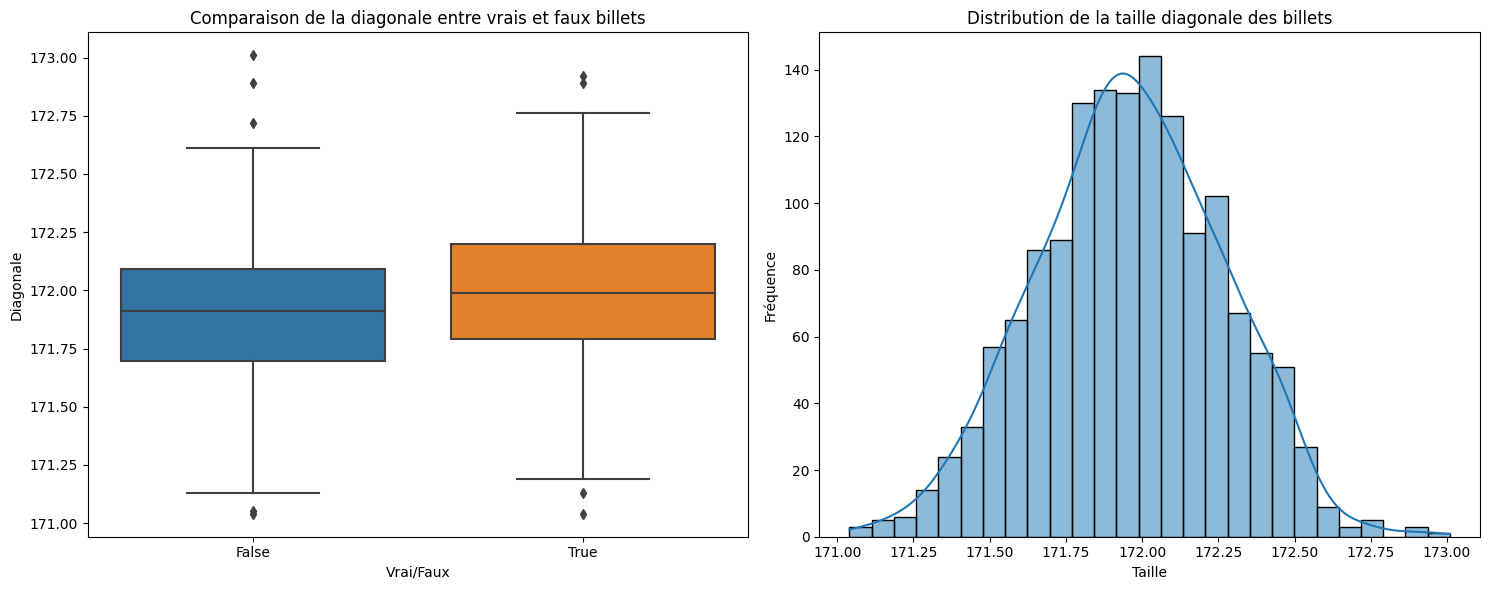

In [18]:
plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x = 'is_genuine', y = 'diagonal', data = liste_billets_sans_NaN)
plt.xlabel('Vrai/Faux')
plt.ylabel('Diagonale')
plt.title('Comparaison de la diagonale entre vrais et faux billets')

plt.subplot(1, 2, 2)
sns.histplot(data = liste_billets_sans_NaN, x = 'diagonal', kde = True)
plt.xlabel('Taille')
plt.ylabel('Fréquence')
plt.title('Distribution de la taille diagonale des billets')

plt.tight_layout()
plt.show()

### Les hauteurs à droite des billets

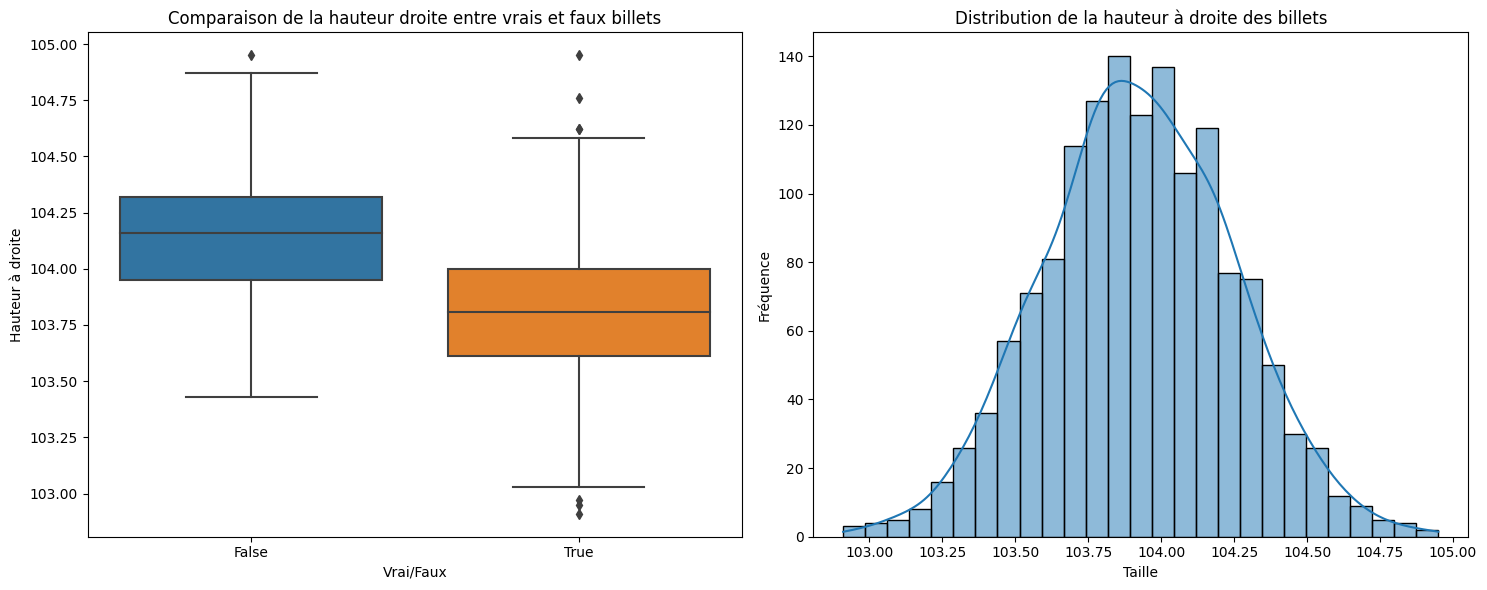

In [19]:
plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x = 'is_genuine', y = 'height_right', data = liste_billets_sans_NaN)
plt.xlabel('Vrai/Faux')
plt.ylabel('Hauteur à droite')
plt.title('Comparaison de la hauteur droite entre vrais et faux billets')

plt.subplot(1, 2, 2)
sns.histplot(data = liste_billets_sans_NaN, x = 'height_right', kde = True)
plt.xlabel('Taille')
plt.ylabel('Fréquence')
plt.title('Distribution de la hauteur à droite des billets')

plt.tight_layout()
plt.show()

### Les hauteurs à gauche des billets

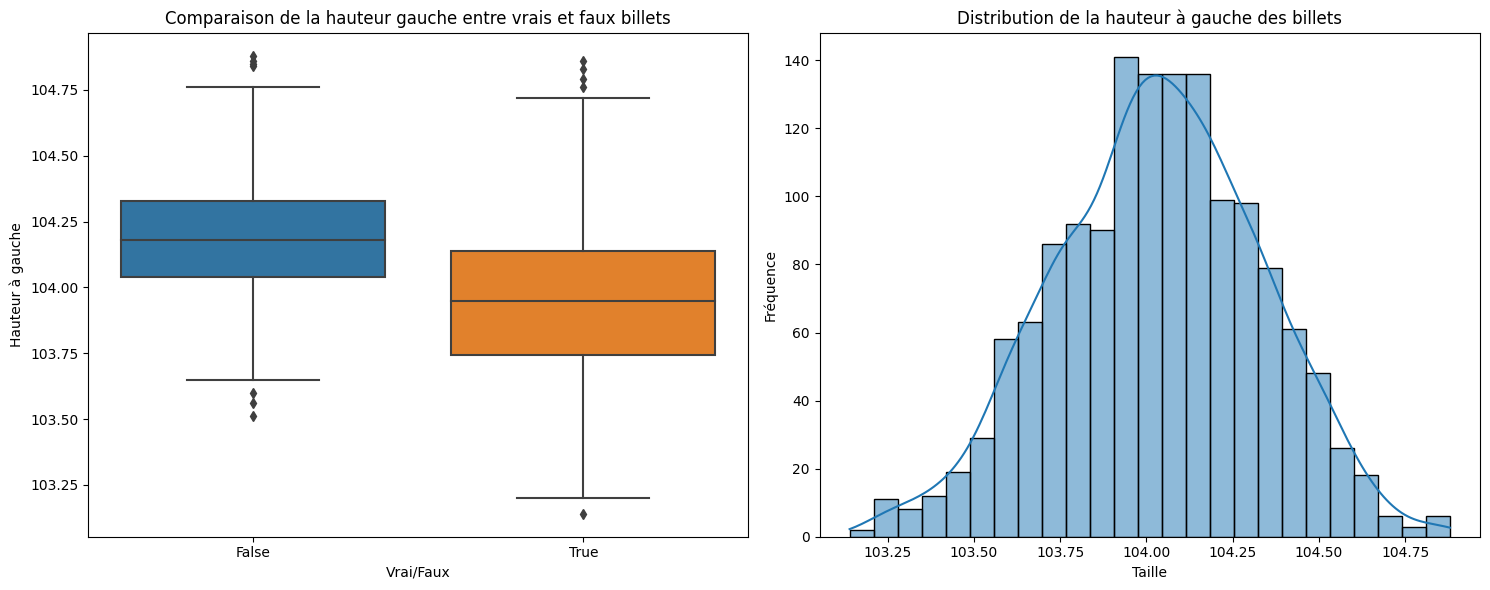

In [20]:
plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x = 'is_genuine', y = 'height_left', data = liste_billets_sans_NaN)
plt.xlabel('Vrai/Faux')
plt.ylabel('Hauteur à gauche')
plt.title('Comparaison de la hauteur gauche entre vrais et faux billets')

plt.subplot(1, 2, 2)
sns.histplot(data = liste_billets_sans_NaN, x = 'height_left', kde = True)
plt.xlabel('Taille')
plt.ylabel('Fréquence')
plt.title('Distribution de la hauteur à gauche des billets')

plt.tight_layout()
plt.show()

### Les marges basses des billets

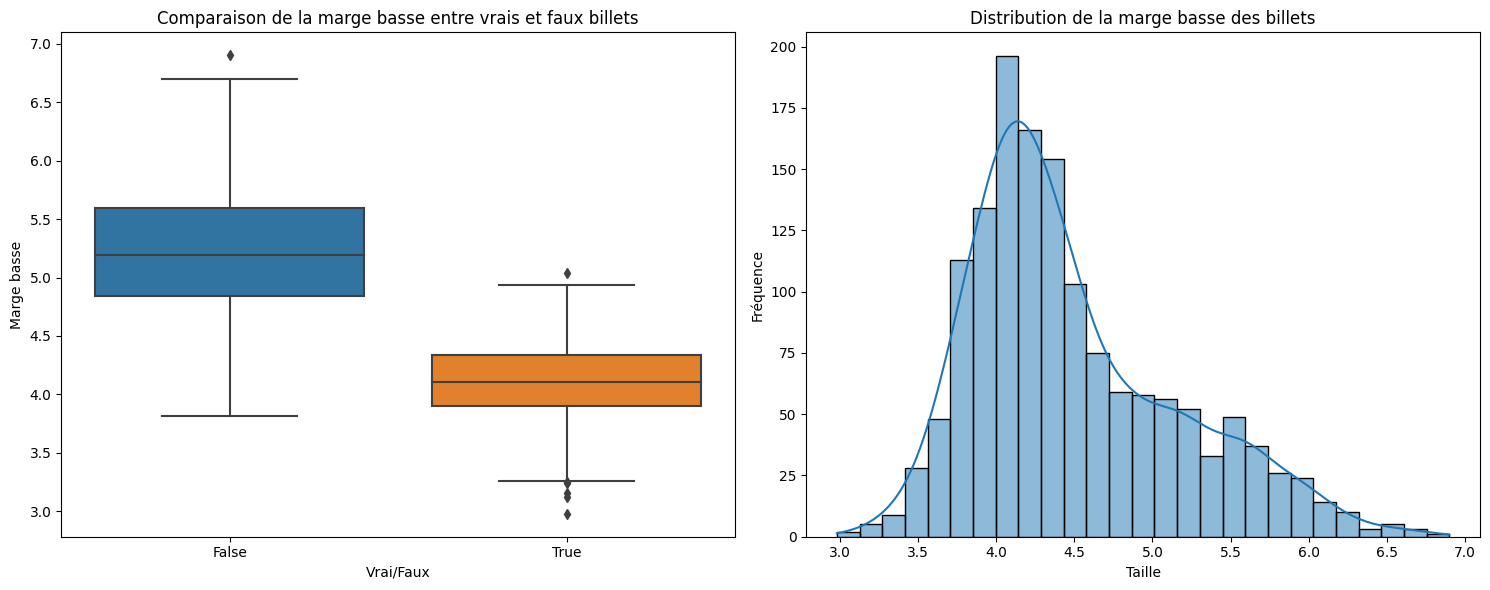

In [21]:
plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x = 'is_genuine', y = 'margin_low', data = liste_billets_sans_NaN)
plt.xlabel('Vrai/Faux')
plt.ylabel('Marge basse')
plt.title('Comparaison de la marge basse entre vrais et faux billets')

plt.subplot(1, 2, 2)
sns.histplot(data = liste_billets_sans_NaN, x = 'margin_low', kde = True)
plt.xlabel('Taille')
plt.ylabel('Fréquence')
plt.title('Distribution de la marge basse des billets')

plt.tight_layout()
plt.show()

### Les marges hautes des billets

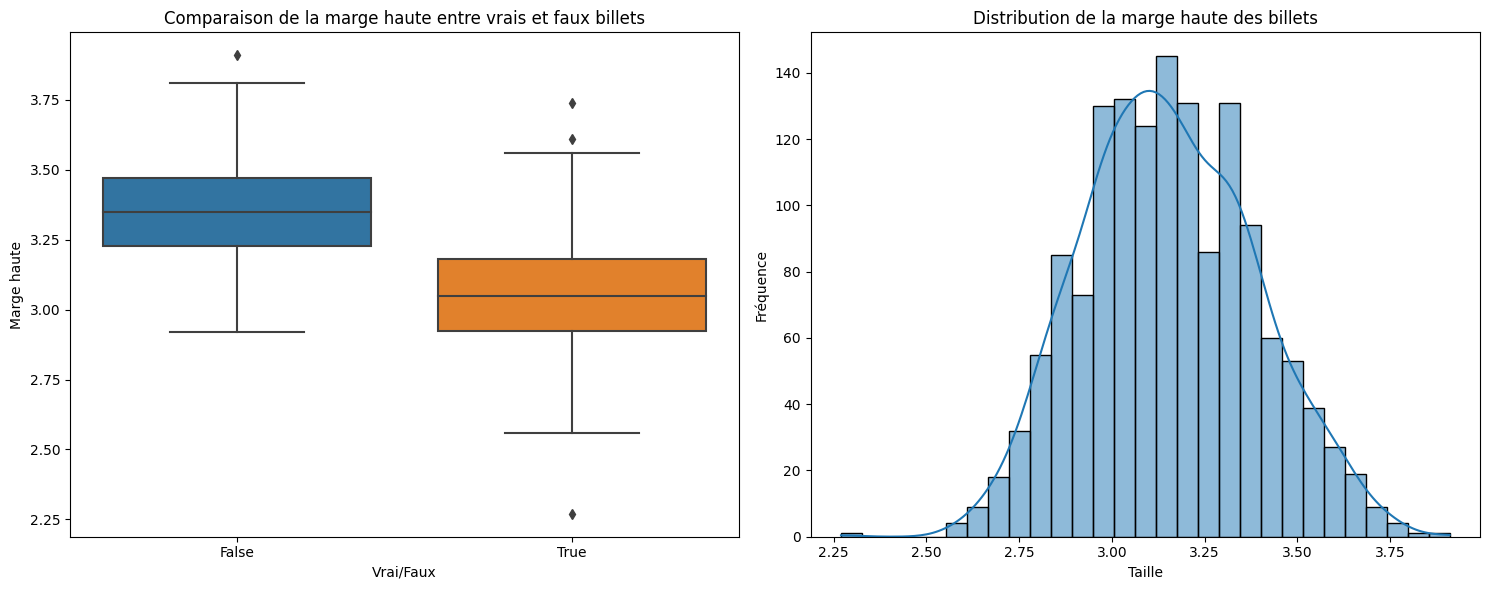

In [22]:
plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x = 'is_genuine', y = 'margin_up', data = liste_billets_sans_NaN)
plt.xlabel('Vrai/Faux')
plt.ylabel('Marge haute')
plt.title('Comparaison de la marge haute entre vrais et faux billets')

plt.subplot(1, 2, 2)
sns.histplot(data = liste_billets_sans_NaN, x = 'margin_up', kde = True)
plt.xlabel('Taille')
plt.ylabel('Fréquence')
plt.title('Distribution de la marge haute des billets')

plt.tight_layout()
plt.show()

### La longueur des billets

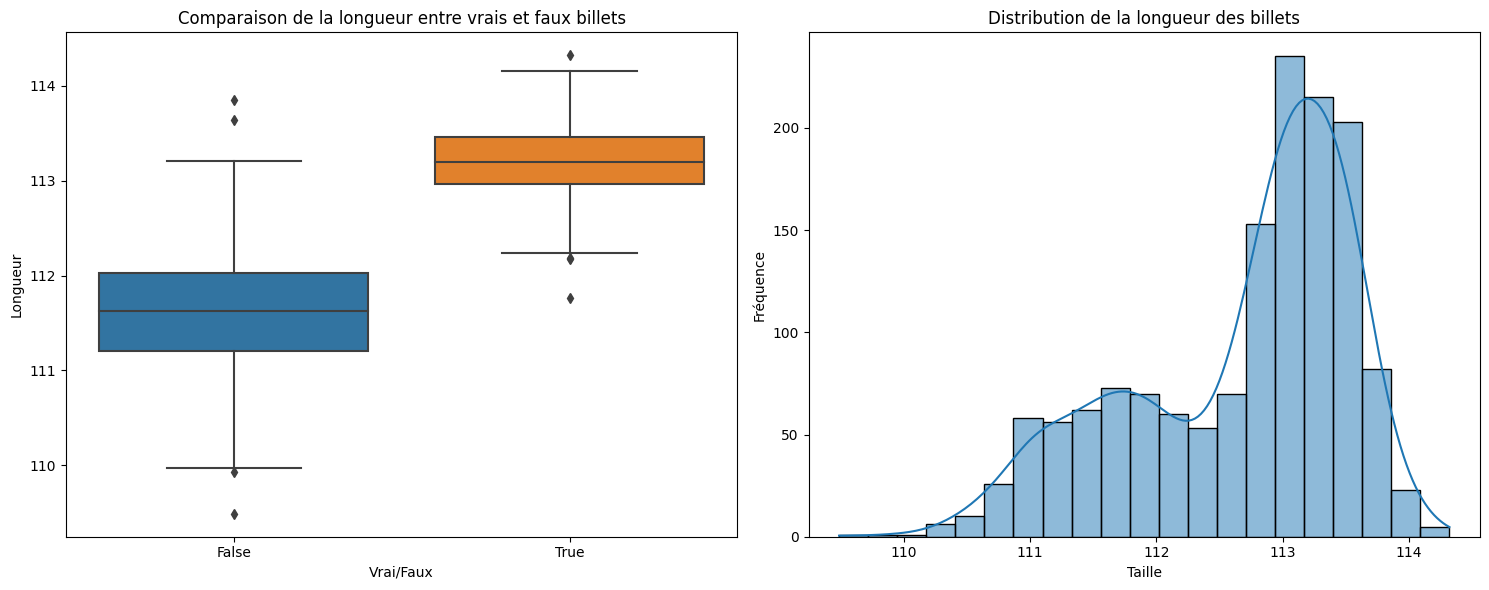

In [23]:
plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x = 'is_genuine', y = 'length', data = liste_billets_sans_NaN)
plt.xlabel('Vrai/Faux')
plt.ylabel('Longueur')
plt.title('Comparaison de la longueur entre vrais et faux billets')

plt.subplot(1, 2, 2)
sns.histplot(data = liste_billets_sans_NaN, x = 'length', kde = True)
plt.xlabel('Taille')
plt.ylabel('Fréquence')
plt.title('Distribution de la longueur des billets')

plt.tight_layout()
plt.show()

## Analyses bivariées

### Pairplot

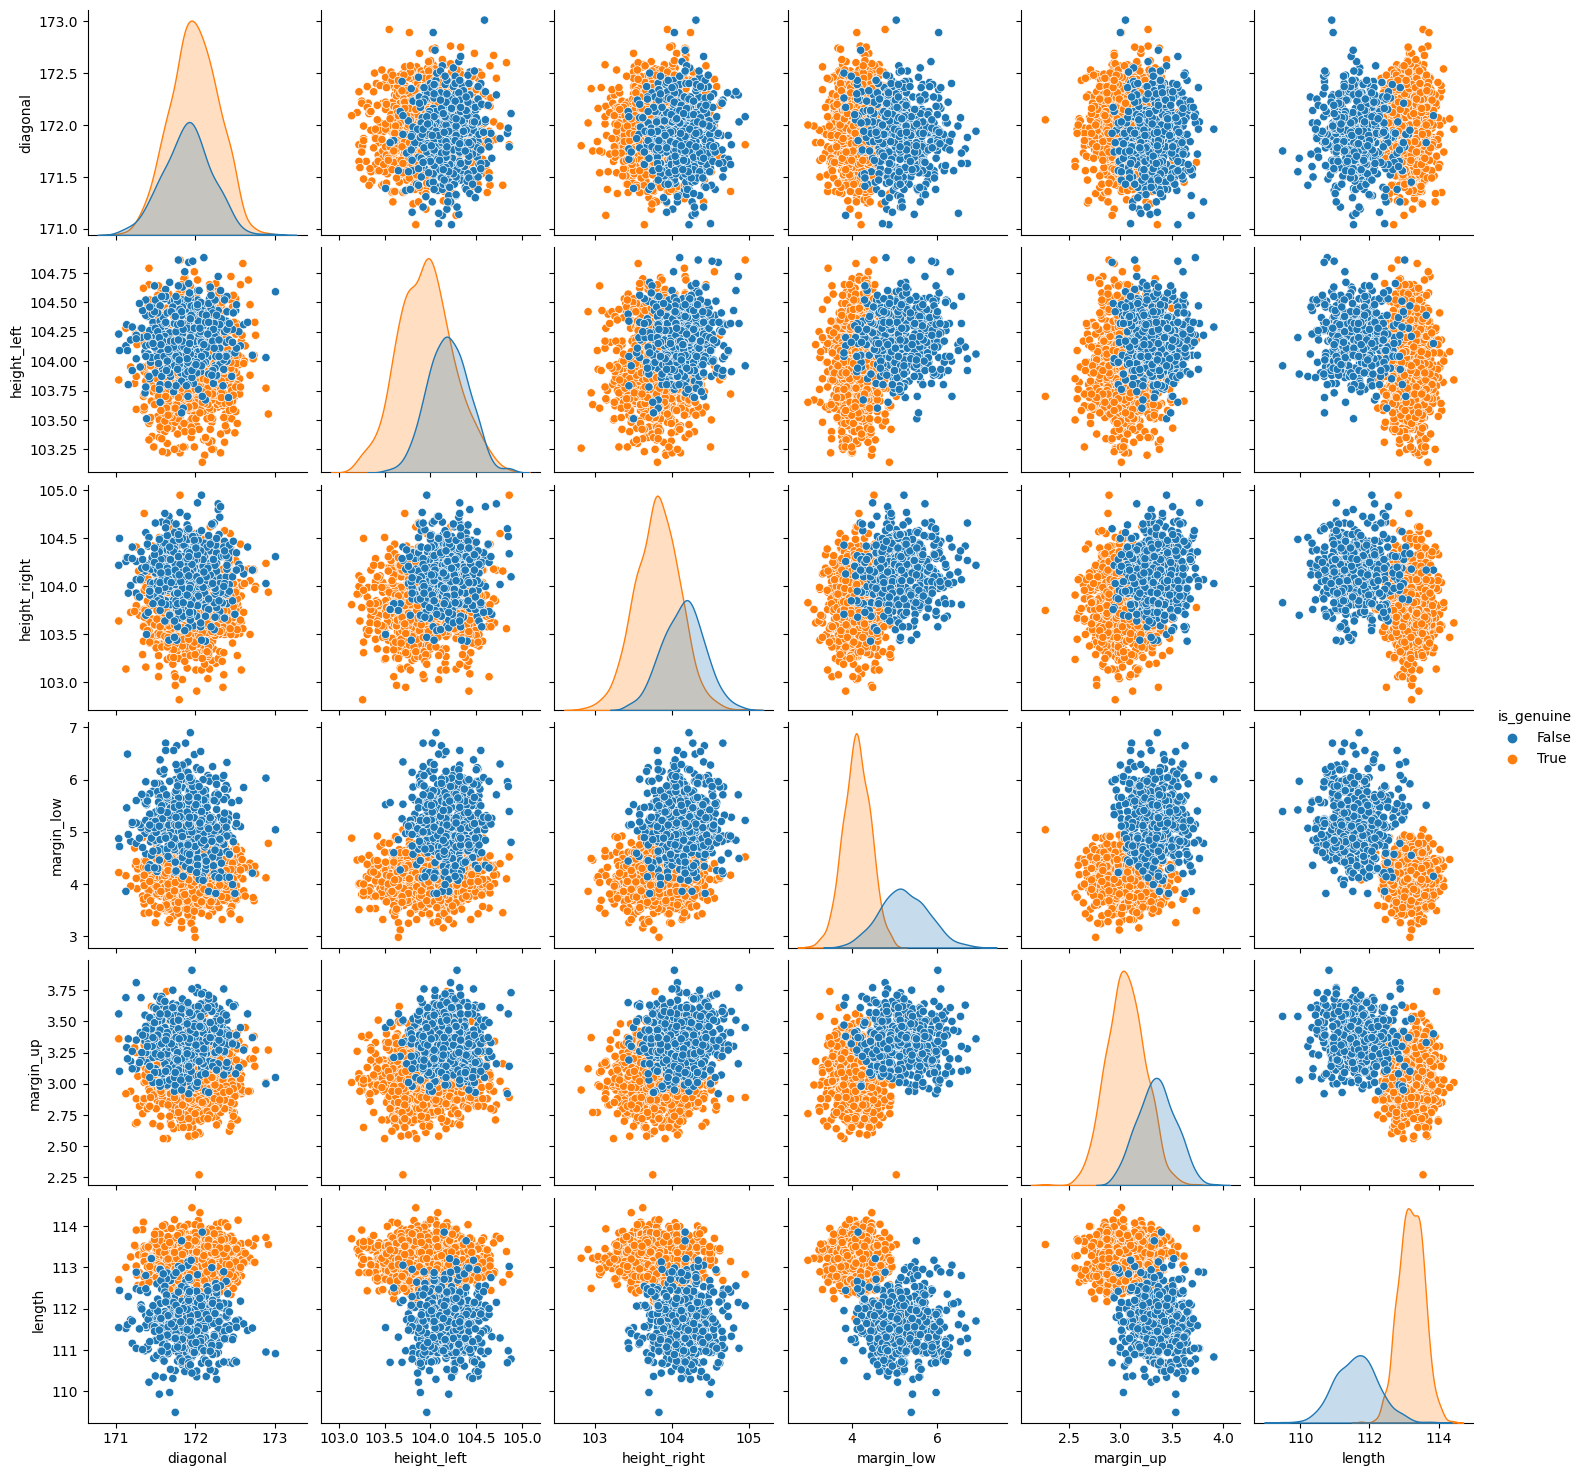

In [24]:
colonnes_pour_pairplot = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']
sns.pairplot(liste_billets, hue = 'is_genuine')
plt.show()

### Matrice de corrélation :

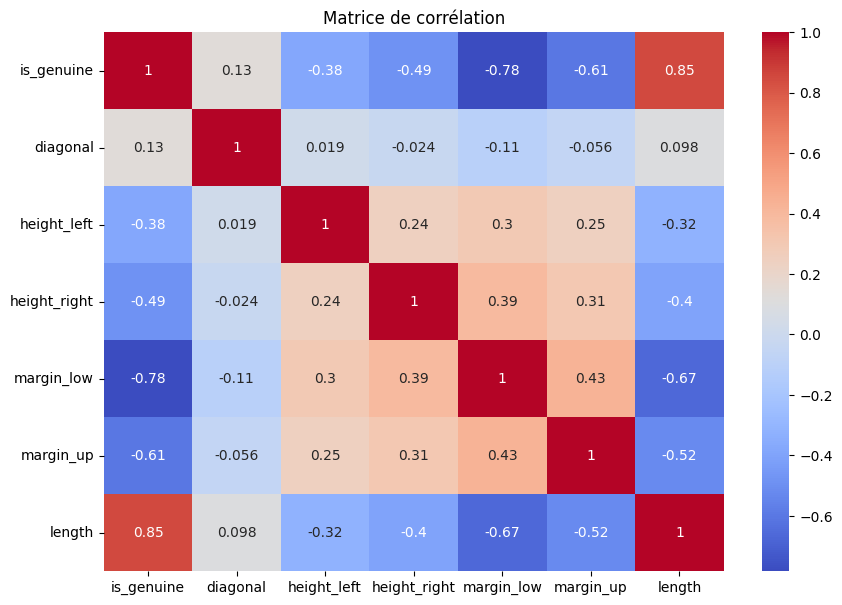

In [25]:
plt.figure(figsize=(10, 7))
sns.heatmap(liste_billets.corr(), annot = True, cmap = 'coolwarm')
plt.title('Matrice de corrélation')
plt.show()

# Régression linéaire sur les données des billets

### Modèle OLS

In [26]:
X_OLS = liste_billets_sans_NaN[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']]
y_OLS = liste_billets_sans_NaN['margin_low']

X_train, X_test, y_train, y_test = train_test_split(X_OLS, y_OLS, test_size=0.2, random_state=42)

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

modele_OLS = sm.OLS(y_train, X_train_const).fit()

print(modele_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     198.7
Date:                Sat, 30 Mar 2024   Prob (F-statistic):          3.54e-153
Time:                        16:54:42   Log-Likelihood:                -825.58
No. Observations:                1170   AIC:                             1663.
Df Residuals:                    1164   BIC:                             1694.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           20.3960     11.266      1.810   

### Modèle OLS_2 : 'sans diagonal'

In [27]:
X_OLS_2 = liste_billets_sans_NaN[['height_left', 'height_right', 'margin_up', 'length']]
y_OLS_2 = liste_billets_sans_NaN['margin_low']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_OLS_2, y_OLS_2, test_size=0.2, random_state=42)

X_train_2_const = sm.add_constant(X_train_2)
X_test_2_const = sm.add_constant(X_test_2)

modele_OLS_2 = sm.OLS(y_train_2, X_train_2_const).fit()

print(modele_OLS_2.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     247.1
Date:                Sat, 30 Mar 2024   Prob (F-statistic):          1.07e-153
Time:                        16:54:42   Log-Likelihood:                -827.22
No. Observations:                1170   AIC:                             1664.
Df Residuals:                    1165   BIC:                             1690.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.0775      8.016      0.758   

## Tests liés à la régression linéaire

### Test VIF

In [28]:
variables = liste_billets_sans_NaN[['height_left', 'height_right', 'margin_low', 'margin_up', 'length']]

X_VIF = sm.add_constant(variables)

VIF = pd.DataFrame()
VIF["Score du VIF"] = [variance_inflation_factor(X_VIF.values, i) for i in range(X_VIF.shape[1])]
VIF["Caractéristique"] = X_VIF.columns

VIF.tail()

,Score du VIF,Caractéristique
1,1.147526,height_left
2,1.259215,height_right
3,1.903892,margin_low
4,1.419586,margin_up
5,2.126807,length


### Test d'homoscédasticité 

In [29]:
X_test_homosc = liste_billets_sans_NaN[['height_left', 'height_right', 'margin_low', 'margin_up', 'length']]
Y_test_homosc = liste_billets_sans_NaN['is_genuine']

X_test_homosc = sm.add_constant(X_test_homosc)

modele_test_homosc = sm.OLS(Y_test_homosc, X_test_homosc).fit()
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(modele_test_homosc.resid, X_test_homosc)

print(f'p_value du test de Breusch-Pagan : {lm_p_value}')

p_value du test de Breusch-Pagan : 1.8380206396559952e-17


### Test de la normalité de distribution des résidus

In [30]:
y_pred = modele_OLS_2.predict(sm.add_constant(X_OLS_2))

residus = y_OLS_2 - y_pred

stat, p_value = shapiro(residus)

print('Statistique du test de Shapiro:', stat)
print('P-value:', p_value)

Statistique du test de Shapiro: 0.9845336079597473
P-value: 2.0806058265154803e-11


## Utilisation du modèle pour remplir les NaN (interpolation linéaire)

In [31]:
df_a_predire = (liste_billets
 .loc[liste_billets.margin_low.isna()]
 .drop(columns=["is_genuine", "margin_low", "diagonal"]))

df_a_predire.head()

,height_left,height_right,margin_up,length
72,103.89,103.45,3.25,112.79
99,104.07,104.18,3.14,113.08
151,103.80,104.38,3.02,112.93
197,103.66,103.80,3.62,113.27
241,104.14,104.06,3.02,112.36


#### Remplacement des valeurs manquantes

In [32]:
margin_low_predite = modele_OLS_2.predict(sm.add_constant(df_a_predire))
liste_billets.loc[df_a_predire.index, 'margin_low'] = margin_low_predite

liste_billets.loc[liste_billets['margin_low'].isna()]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length


# ACP

### Éboulis des valeurs propres

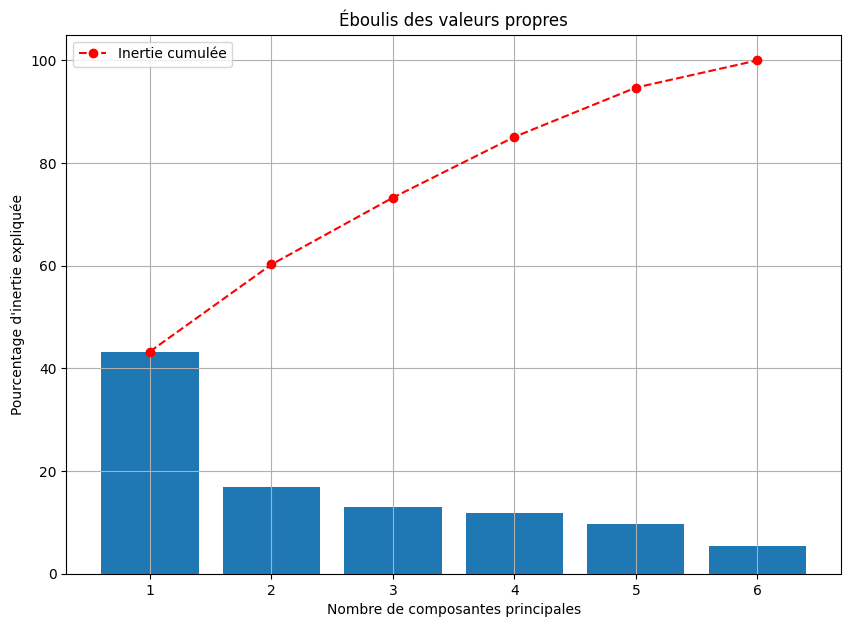

In [33]:
colonnes_a_utiliser = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']
donnees_pour_ACP = liste_billets[colonnes_a_utiliser]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(donnees_pour_ACP)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

inertie = pca.explained_variance_ratio_ * 100

x_values = range(1, len(inertie) + 1)

plt.figure(figsize=(10, 7))
plt.bar(x_values, inertie)
plt.plot(x_values, np.cumsum(inertie), c="red", marker="o", linestyle='--', label='Inertie cumulée')
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Pourcentage d'inertie expliquée")
plt.title("Éboulis des valeurs propres")
plt.xticks(x_values)
plt.grid(True)
plt.legend()
plt.show()

### Cercle de corrélations

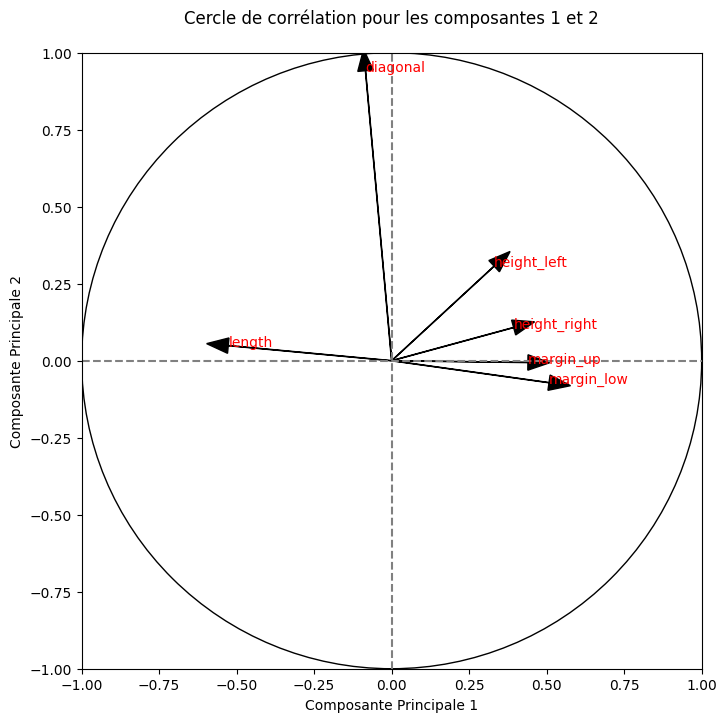

In [34]:
col_names = colonnes_a_utiliser

fig, ax = plt.subplots(figsize=(8, 8))

cercle = plt.Circle((0, 0), 1, facecolor="none", edgecolor="black")
ax.add_artist(cercle)

for i in range(len(pca.components_[0])):
    ax.arrow(0, 0,
             pca.components_[0, i], pca.components_[1, i],
             head_width=0.05, head_length=0.07, fc="black", ec="black")
    ax.text(pca.components_[0, i], pca.components_[1, i], col_names[i], color="red")

ax.set_xlabel("Composante Principale 1")
ax.set_ylabel("Composante Principale 2")
ax.set_title("Cercle de corrélation pour les composantes 1 et 2\n")
ax.axhline(0, color="grey", linestyle="--")
ax.axvline(0, color="grey", linestyle="--")
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

plt.show()

### Nuage de points des individus selon l'ACP

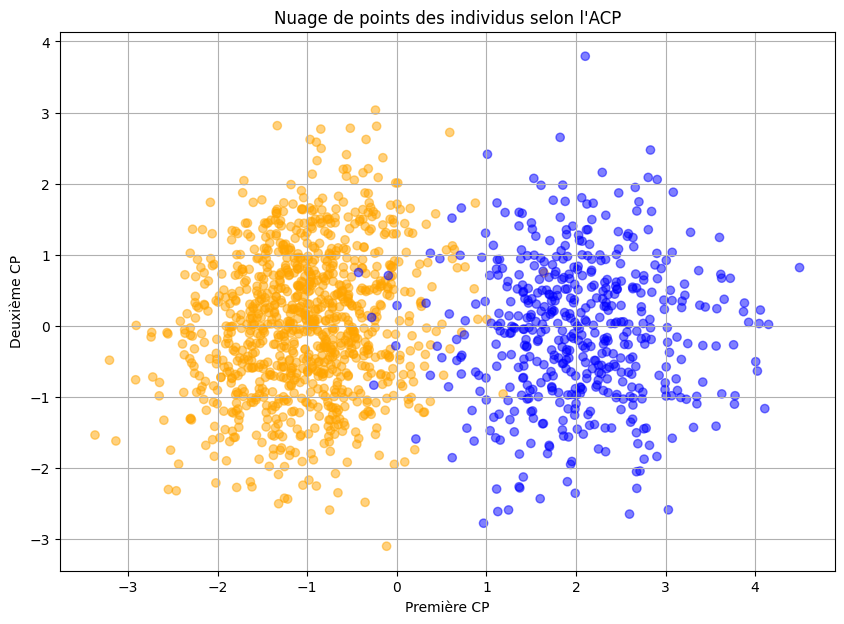

In [35]:
colors = liste_billets['is_genuine'].map({True: 'orange', False: 'blue'})

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.5)
plt.title("Nuage de points des individus selon l'ACP")
plt.xlabel("Première CP")
plt.ylabel("Deuxième CP")
plt.grid()
plt.show()

# Régression logistique pour prédire l'authenticité des billets

### Modèle OLS

In [36]:
X_OLS_3 = liste_billets[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']]
y_OLS_3 = liste_billets['is_genuine']

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_OLS_3, y_OLS_3, test_size=0.2, random_state=42)

X_train_const = sm.add_constant(X_train_3)
X_test_const = sm.add_constant(X_test_3)

modele_logist = sm.Logit(y_train_3, X_train_const).fit()

print(modele_logist.summary())

Optimization terminated successfully.
         Current function value: 0.030441
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1200
Model:                          Logit   Df Residuals:                     1193
Method:                           MLE   Df Model:                            6
Date:                Sat, 30 Mar 2024   Pseudo R-squ.:                  0.9517
Time:                        16:54:43   Log-Likelihood:                -36.529
converged:                       True   LL-Null:                       -756.70
Covariance Type:            nonrobust   LLR p-value:                4.467e-308
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -83.6215    257.724     -0.324      0.746    -588.751     421.508
diagonal        -0.384

### Modèle OLS_4 : sans 'diagonal'

In [37]:
X_OLS_4 = liste_billets[['height_left', 'height_right', 'margin_low', 'margin_up', 'length']]
y_OLS_4 = liste_billets['is_genuine']

X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_OLS_4, y_OLS_4, test_size=0.2, random_state=42)

X_train_const = sm.add_constant(X_train_4)
X_test_const = sm.add_constant(X_test_4)

modele_logist_2 = sm.Logit(y_train_4, X_train_const).fit()

print(modele_logist_2.summary())

Optimization terminated successfully.
         Current function value: 0.030488
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1200
Model:                          Logit   Df Residuals:                     1194
Method:                           MLE   Df Model:                            5
Date:                Sat, 30 Mar 2024   Pseudo R-squ.:                  0.9517
Time:                        16:54:43   Log-Likelihood:                -36.585
converged:                       True   LL-Null:                       -756.70
Covariance Type:            nonrobust   LLR p-value:                2.646e-309
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -147.1542    174.818     -0.842      0.400    -489.792     195.483
height_left     -1.874

### Modèle OLS_4 : sans 'diagonal' ni 'height_left'

In [38]:
X_OLS_5 = liste_billets[['height_right', 'margin_low', 'margin_up', 'length']]
y_OLS_5 = liste_billets['is_genuine']

X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_OLS_5, y_OLS_5, test_size=0.2, random_state=42)

X_train_const = sm.add_constant(X_train_5)
X_test_const = sm.add_constant(X_test_5)

modele_logist_3 = sm.Logit(y_train_5, X_train_const).fit()

print(modele_logist_3.summary())

Optimization terminated successfully.
         Current function value: 0.031405
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1200
Model:                          Logit   Df Residuals:                     1195
Method:                           MLE   Df Model:                            4
Date:                Sat, 30 Mar 2024   Pseudo R-squ.:                  0.9502
Time:                        16:54:43   Log-Likelihood:                -37.686
converged:                       True   LL-Null:                       -756.70
Covariance Type:            nonrobust   LLR p-value:                3.934e-310
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -294.9173    152.205     -1.938      0.053    -593.234       3.399
height_right    -2.793

### Matrice de confusion : régression logistique

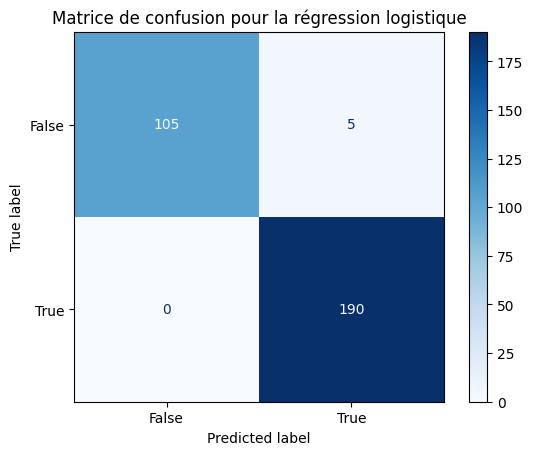

Précision de la régression logistique : 0.9833333333333333


In [39]:
model = LogisticRegression(max_iter=1000)

model.fit(X_train_5, y_train_5)

predictions_mat_confusion = model.predict(X_test_5)

conf_matrix = confusion_matrix(y_test_5, predictions_mat_confusion)

accuracy_logistic = accuracy_score(y_test_5, predictions_mat_confusion)

cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['False', 'True'])
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Matrice de confusion pour la régression logistique')
plt.show()

print("Précision de la régression logistique :", accuracy_logistic)

# K-means, une méthode de détection plus adaptée ?

### Matrice de confusion : K-means

Silhouette Score: 0.5763972469448787


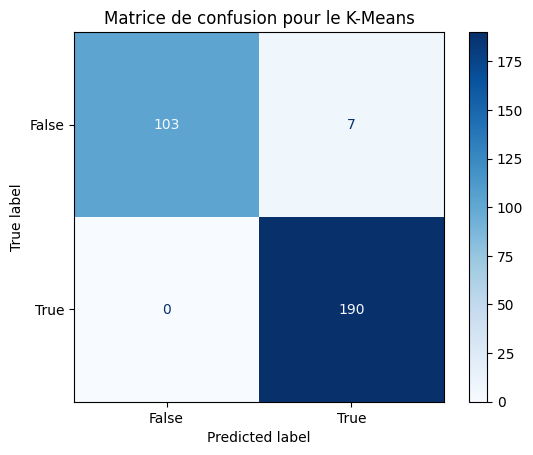

Précision du K-Means: 0.9766666666666667


In [40]:
X_kmeans = liste_billets[['height_right', 'margin_low', 'margin_up', 'length']]

kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
kmeans.fit(X_kmeans)

labels_kmeans = kmeans.labels_

silhouette_avg = silhouette_score(X_kmeans, labels_kmeans)
print("Silhouette Score:", silhouette_avg)

labels_kmeans_test = kmeans.predict(X_test_5)

conf_matrix_kmeans = confusion_matrix(y_test_5, labels_kmeans_test)

cm_display_kmeans = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_kmeans, display_labels=['False', 'True'])
cm_display_kmeans.plot(cmap=plt.cm.Blues)
plt.title('Matrice de confusion pour le K-Means')
plt.show()

accuracy_kmeans = accuracy_score(y_test_5, labels_kmeans_test)
print("Précision du K-Means:", accuracy_kmeans)

## Pour le test de l'algorithme en direct

#### Sauvegarde du modèle dans un fichier pickle

In [41]:
with open(r'C:\Users\jbfal\OneDrive\Bureau\Open Classrooms\Formation\Projet 10 (13.03.2024)\Test en direct.pkl', 'wb') as file:
    pickle.dump(modele_logist_3, file)